It was suggested in ICLR reviews that Batch Normalization (BN) could improve fault tolerance.

This could happen because the neurons receive similar activations within appropriate range

We train fully-connected networks on MNIST with and without BN. We compare the fault tolerance. In case if it is better with BN, we compare it to using our approach.

In [79]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from experiment_model import *
import scipy

In [27]:
# see https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
# channels last
# Making images grayscale (adding repeated 2 more channels)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).repeat(3, axis = 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).repeat(3, axis = 3)

In [29]:
input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 3)
60000 train samples
10000 test samples


In [18]:
def get_model(use_batch_norm = False):
    """ Create a simple CNN with or without Batch Norm for the input layer """
    
    model = Sequential()
    if use_batch_norm:
        model.add(BatchNormalization(input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='softplus',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='softplus'))
    #model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding = 'same', activation='softplus'))
    model.add(Conv2D(64, (3, 3), padding = 'same', activation='softplus'))
    #model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='softplus'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    print(x_train.shape)
    
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    plt.figure()
    plt.plot(history.history['acc'], label = 'acc')
    plt.plot(history.history['val_acc'], label = 'val_acc')
    plt.show()
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return model

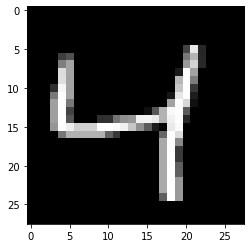

In [46]:
# probability of input failure
p = 0.001

# obtain input
x = np.array([x_train[2]])
plt.imshow(x[0])
plt.show()

In [68]:
# FT errors without and with batch norm
errors_nobatch = []
errors_batch = []

# number of forward passes for one data point
repetitions = 5000

# number of repetitions of the whole experiment
networks = 20

(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/step - loss: 1.4907 - acc: 0.4509 - val_loss: 0.1159 - val_acc: 0.9628
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1438 - acc: 0.9576 - val_loss: 0.0548 - val_acc: 0.9831
Epoch 3/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0923 - acc: 0.9722 - val_loss: 0.0432 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0723 - acc: 0.9788 - val_loss: 0.0348 - val_acc: 0.9871
Epoch 5/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0624 - acc: 0.9821 - val_loss: 0.0276 - val_acc: 0.9914
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0563 - acc: 0.9837 - val_loss: 0.0229 - val_acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0498 - acc: 0.9851 - val_los

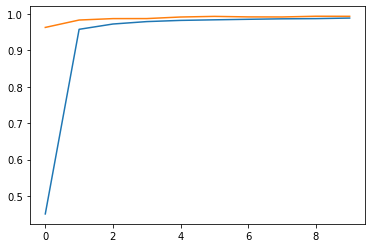

Test loss: 0.02008178976834779
Test accuracy: 0.9933
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/step - loss: 1.0043 - acc: 0.6391 - val_loss: 0.0587 - val_acc: 0.9804
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.1080 - acc: 0.9685 - val_loss: 0.0395 - val_acc: 0.9871
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0724 - acc: 0.9790 - val_loss: 0.0322 - val_acc: 0.9902
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0576 - acc: 0.9832 - val_loss: 0.0271 - val_acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0464 - acc: 0.9865 - val_loss: 0.0237 - val_acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0428 - acc: 0.9881 - val_loss: 0.0200 - val_acc: 0.9933
Epoch 7/10
60000/60000 [==============================] 

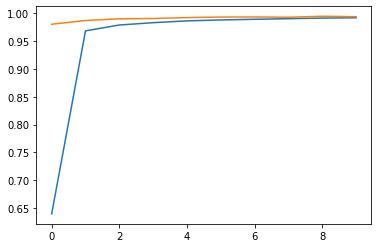

Test loss: 0.0193634584459448
Test accuracy: 0.994
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 2.1963 - acc: 0.1697 - val_loss: 0.3371 - val_acc: 0.9028
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2046 - acc: 0.9397 - val_loss: 0.0555 - val_acc: 0.9822
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1029 - acc: 0.9705 - val_loss: 0.0496 - val_acc: 0.9833
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0768 - acc: 0.9781 - val_loss: 0.0306 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0630 - acc: 0.9815 - val_loss: 0.0292 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0592 - acc: 0.9828 - val_loss: 0.0294 - val_acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 

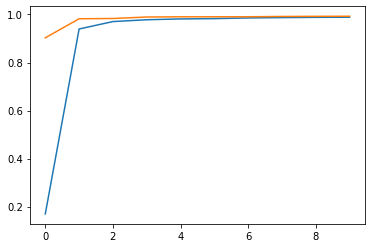

Test loss: 0.02330477582238418
Test accuracy: 0.9927
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.6369 - acc: 0.7826 - val_loss: 0.0631 - val_acc: 0.9788
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1043 - acc: 0.9691 - val_loss: 0.0434 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0726 - acc: 0.9789 - val_loss: 0.0249 - val_acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0566 - acc: 0.9833 - val_loss: 0.0394 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0474 - acc: 0.9865 - val_loss: 0.0259 - val_acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0408 - acc: 0.9879 - val_loss: 0.0200 - val_acc: 0.9933
Epoch 7/10
60000/60000 [==============================]

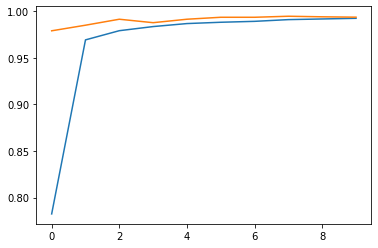

Test loss: 0.020096649935655478
Test accuracy: 0.9934
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 2.3288 - acc: 0.1083 - val_loss: 2.2799 - val_acc: 0.1259
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.4452 - acc: 0.8558 - val_loss: 0.1430 - val_acc: 0.9569
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1077 - acc: 0.9687 - val_loss: 0.0397 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0801 - acc: 0.9774 - val_loss: 0.0367 - val_acc: 0.9868
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0638 - acc: 0.9814 - val_loss: 0.0312 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0555 - acc: 0.9835 - val_loss: 0.0327 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================

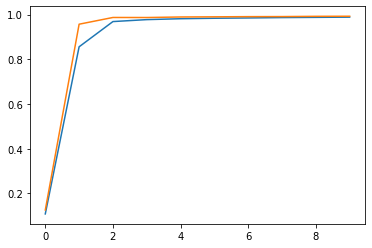

Test loss: 0.023562093731296772
Test accuracy: 0.9925
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.6658 - acc: 0.7702 - val_loss: 0.0578 - val_acc: 0.9817
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1068 - acc: 0.9690 - val_loss: 0.0381 - val_acc: 0.9873
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0710 - acc: 0.9791 - val_loss: 0.0279 - val_acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0569 - acc: 0.9831 - val_loss: 0.0226 - val_acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0468 - acc: 0.9865 - val_loss: 0.0250 - val_acc: 0.9914
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0412 - acc: 0.9886 - val_loss: 0.0174 - val_acc: 0.9936
Epoch 7/10
60000/60000 [==============================

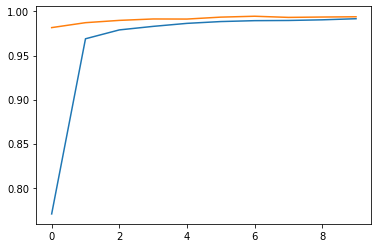

Test loss: 0.02015781833795186
Test accuracy: 0.994
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/step - loss: 2.1296 - acc: 0.1942 - val_loss: 0.2688 - val_acc: 0.9153
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1977 - acc: 0.9409 - val_loss: 0.0578 - val_acc: 0.9830
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0975 - acc: 0.9721 - val_loss: 0.0357 - val_acc: 0.9893
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0729 - acc: 0.9786 - val_loss: 0.0304 - val_acc: 0.9906
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0610 - acc: 0.9826 - val_loss: 0.0273 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0551 - acc: 0.9839 - val_loss: 0.0301 - val_acc: 0.9908
Epoch 7/10
60000/60000 [==============================] 

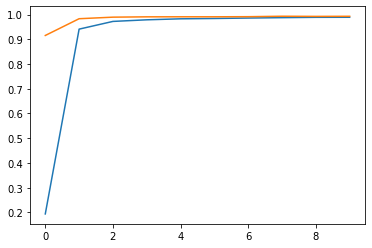

Test loss: 0.02471698156892844
Test accuracy: 0.9928
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.7674 - acc: 0.7327 - val_loss: 0.0740 - val_acc: 0.9767
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1080 - acc: 0.9688 - val_loss: 0.0499 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0730 - acc: 0.9794 - val_loss: 0.0328 - val_acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0570 - acc: 0.9841 - val_loss: 0.0334 - val_acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0476 - acc: 0.9864 - val_loss: 0.0237 - val_acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0416 - acc: 0.9886 - val_loss: 0.0239 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================

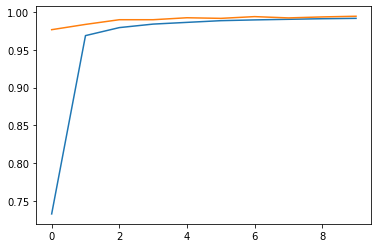

Test loss: 0.019241207265059575
Test accuracy: 0.9945
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/step - loss: 2.3247 - acc: 0.1093 - val_loss: 2.3061 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3699 - acc: 0.8818 - val_loss: 0.0629 - val_acc: 0.9793
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1048 - acc: 0.9692 - val_loss: 0.0360 - val_acc: 0.9892
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0778 - acc: 0.9776 - val_loss: 0.0350 - val_acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0633 - acc: 0.9813 - val_loss: 0.0326 - val_acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0582 - acc: 0.9837 - val_loss: 0.0275 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================

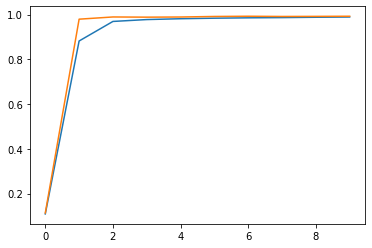

Test loss: 0.025319246742838232
Test accuracy: 0.9924
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.6577 - acc: 0.7774 - val_loss: 0.0781 - val_acc: 0.9741
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1087 - acc: 0.9673 - val_loss: 0.0385 - val_acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0756 - acc: 0.9777 - val_loss: 0.0322 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0566 - acc: 0.9829 - val_loss: 0.0304 - val_acc: 0.9907
Epoch 5/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0481 - acc: 0.9863 - val_loss: 0.0252 - val_acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0414 - acc: 0.9880 - val_loss: 0.0237 - val_acc: 0.9921
Epoch 7/10
60000/60000 [==============================

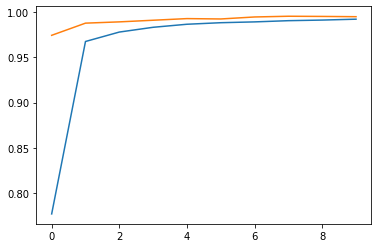

Test loss: 0.017217723118135474
Test accuracy: 0.9946
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 2.1230 - acc: 0.1943 - val_loss: 0.2645 - val_acc: 0.9211
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1907 - acc: 0.9448 - val_loss: 0.0601 - val_acc: 0.9809
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0996 - acc: 0.9710 - val_loss: 0.0369 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0767 - acc: 0.9772 - val_loss: 0.0338 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0629 - acc: 0.9819 - val_loss: 0.0339 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0566 - acc: 0.9836 - val_loss: 0.0284 - val_acc: 0.9896
Epoch 7/10
60000/60000 [==============================

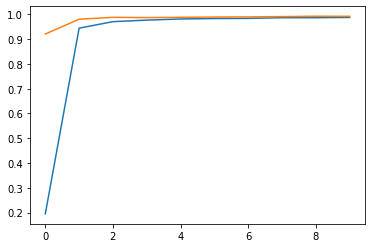

Test loss: 0.022027028767403225
Test accuracy: 0.9927
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.6561 - acc: 0.7777 - val_loss: 0.0651 - val_acc: 0.9789
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1073 - acc: 0.9686 - val_loss: 0.0442 - val_acc: 0.9844
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0723 - acc: 0.9786 - val_loss: 0.0339 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0565 - acc: 0.9841 - val_loss: 0.0261 - val_acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0489 - acc: 0.9861 - val_loss: 0.0287 - val_acc: 0.9921
Epoch 6/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0437 - acc: 0.9871 - val_loss: 0.0242 - val_acc: 0.9920
Epoch 7/10
60000/60000 [==============================

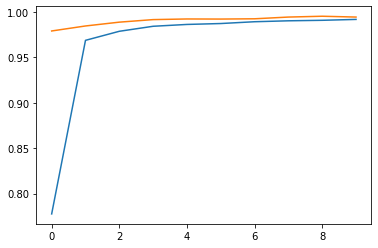

Test loss: 0.02162259990059888
Test accuracy: 0.9942
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 2.3180 - acc: 0.1099 - val_loss: 2.7646 - val_acc: 0.1028
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3407 - acc: 0.8932 - val_loss: 0.0605 - val_acc: 0.9805
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.1049 - acc: 0.9688 - val_loss: 0.0427 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0795 - acc: 0.9770 - val_loss: 0.0336 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0649 - acc: 0.9810 - val_loss: 0.0351 - val_acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0576 - acc: 0.9832 - val_loss: 0.0252 - val_acc: 0.9915
Epoch 7/10
60000/60000 [==============================]

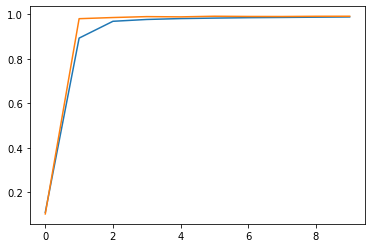

Test loss: 0.02701006980412885
Test accuracy: 0.9915
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.7211 - acc: 0.7504 - val_loss: 0.0655 - val_acc: 0.9787
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.1017 - acc: 0.9701 - val_loss: 0.0343 - val_acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0733 - acc: 0.9789 - val_loss: 0.0279 - val_acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0592 - acc: 0.9829 - val_loss: 0.0234 - val_acc: 0.9923
Epoch 5/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0487 - acc: 0.9860 - val_loss: 0.0249 - val_acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0430 - acc: 0.9873 - val_loss: 0.0190 - val_acc: 0.9933
Epoch 7/10
60000/60000 [==============================

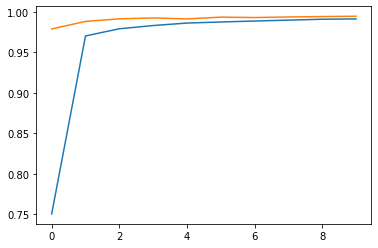

Test loss: 0.01869599892569222
Test accuracy: 0.9944
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 132us/step - loss: 2.3168 - acc: 0.1099 - val_loss: 2.3003 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.6848 - acc: 0.7571 - val_loss: 0.0651 - val_acc: 0.9798
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1076 - acc: 0.9685 - val_loss: 0.0478 - val_acc: 0.9840
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0790 - acc: 0.9770 - val_loss: 0.0301 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0657 - acc: 0.9811 - val_loss: 0.0303 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0531 - acc: 0.9839 - val_loss: 0.0252 - val_acc: 0.9915
Epoch 7/10
60000/60000 [==============================]

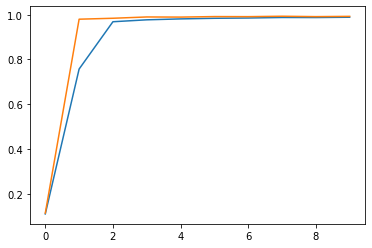

Test loss: 0.026297132498168774
Test accuracy: 0.9925
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.6153 - acc: 0.7906 - val_loss: 0.0631 - val_acc: 0.9797
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1006 - acc: 0.9710 - val_loss: 0.0398 - val_acc: 0.9861
Epoch 3/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0687 - acc: 0.9799 - val_loss: 0.0291 - val_acc: 0.9907
Epoch 4/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0566 - acc: 0.9841 - val_loss: 0.0307 - val_acc: 0.9904
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0475 - acc: 0.9866 - val_loss: 0.0269 - val_acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0421 - acc: 0.9880 - val_loss: 0.0247 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==========================

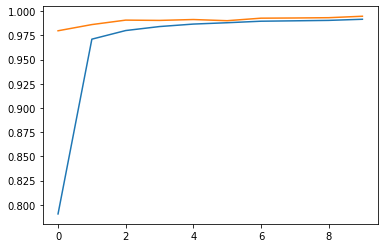

Test loss: 0.017562066415800517
Test accuracy: 0.9947
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/step - loss: 1.7308 - acc: 0.3533 - val_loss: 0.1408 - val_acc: 0.9593
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1581 - acc: 0.9536 - val_loss: 0.0536 - val_acc: 0.9830
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0940 - acc: 0.9709 - val_loss: 0.0405 - val_acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0739 - acc: 0.9786 - val_loss: 0.0350 - val_acc: 0.9886
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0620 - acc: 0.9819 - val_loss: 0.0333 - val_acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0555 - acc: 0.9840 - val_loss: 0.0333 - val_acc: 0.9889
Epoch 7/10
60000/60000 [=============================

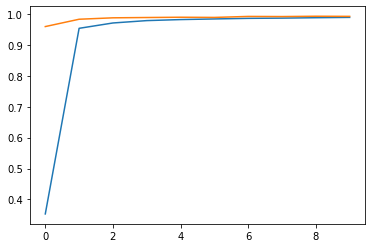

Test loss: 0.02693273225279213
Test accuracy: 0.9923
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.7070 - acc: 0.7543 - val_loss: 0.0614 - val_acc: 0.9812
Epoch 2/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1062 - acc: 0.9691 - val_loss: 0.0341 - val_acc: 0.9874
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0711 - acc: 0.9789 - val_loss: 0.0286 - val_acc: 0.9903
Epoch 4/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0558 - acc: 0.9837 - val_loss: 0.0232 - val_acc: 0.9921
Epoch 5/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0488 - acc: 0.9861 - val_loss: 0.0217 - val_acc: 0.9932
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0417 - acc: 0.9880 - val_loss: 0.0210 - val_acc: 0.9938
Epoch 7/10
60000/60000 [=============================

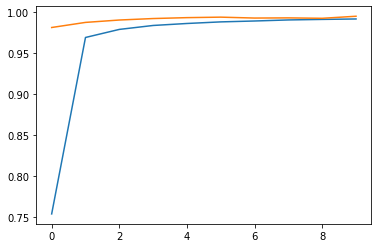

Test loss: 0.02338830621053353
Test accuracy: 0.9949
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 2.3233 - acc: 0.1088 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 2.0232 - acc: 0.2326 - val_loss: 0.1840 - val_acc: 0.9418
Epoch 3/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1721 - acc: 0.9492 - val_loss: 0.0545 - val_acc: 0.9810
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0958 - acc: 0.9717 - val_loss: 0.0350 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0715 - acc: 0.9792 - val_loss: 0.0298 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0610 - acc: 0.9827 - val_loss: 0.0300 - val_acc: 0.9896
Epoch 7/10
60000/60000 [==============================

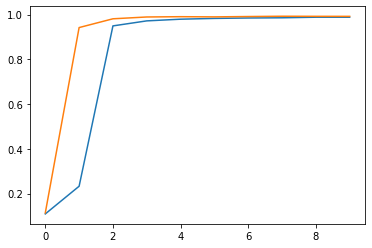

Test loss: 0.026254325292507975
Test accuracy: 0.9919
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.7111 - acc: 0.7589 - val_loss: 0.0838 - val_acc: 0.9752
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1012 - acc: 0.9704 - val_loss: 0.0350 - val_acc: 0.9881
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0675 - acc: 0.9802 - val_loss: 0.0313 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0548 - acc: 0.9839 - val_loss: 0.0251 - val_acc: 0.9916
Epoch 5/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0467 - acc: 0.9864 - val_loss: 0.0247 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0411 - acc: 0.9887 - val_loss: 0.0224 - val_acc: 0.9916
Epoch 7/10
60000/60000 [==============================

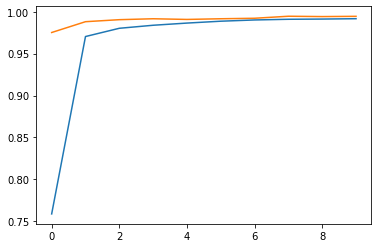

Test loss: 0.017186543708971293
Test accuracy: 0.9945
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 2.0819 - acc: 0.2127 - val_loss: 0.2320 - val_acc: 0.9299
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1892 - acc: 0.9449 - val_loss: 0.0619 - val_acc: 0.9794
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0973 - acc: 0.9716 - val_loss: 0.0366 - val_acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0771 - acc: 0.9774 - val_loss: 0.0364 - val_acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0655 - acc: 0.9808 - val_loss: 0.0335 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0575 - acc: 0.9838 - val_loss: 0.0251 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================

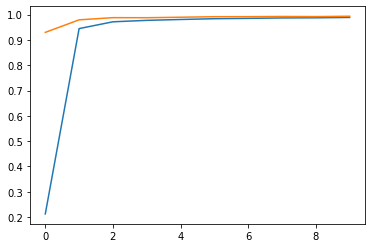

Test loss: 0.01941538595748134
Test accuracy: 0.9936
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.6665 - acc: 0.7737 - val_loss: 0.0585 - val_acc: 0.9820
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1046 - acc: 0.9687 - val_loss: 0.0374 - val_acc: 0.9874
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0717 - acc: 0.9800 - val_loss: 0.0372 - val_acc: 0.9871
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0562 - acc: 0.9841 - val_loss: 0.0266 - val_acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0445 - acc: 0.9867 - val_loss: 0.0235 - val_acc: 0.9920
Epoch 6/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0410 - acc: 0.9885 - val_loss: 0.0219 - val_acc: 0.9933
Epoch 7/10
60000/60000 [==============================

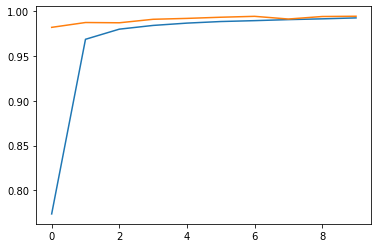

Test loss: 0.023732909124973774
Test accuracy: 0.9944
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/step - loss: 2.2994 - acc: 0.1224 - val_loss: 0.9191 - val_acc: 0.7117
Epoch 2/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.2532 - acc: 0.9236 - val_loss: 0.0715 - val_acc: 0.9780
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1025 - acc: 0.9696 - val_loss: 0.0635 - val_acc: 0.9799
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0749 - acc: 0.9778 - val_loss: 0.0317 - val_acc: 0.9892
Epoch 5/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0656 - acc: 0.9811 - val_loss: 0.0364 - val_acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0555 - acc: 0.9839 - val_loss: 0.0264 - val_acc: 0.9911
Epoch 7/10
60000/60000 [=============================

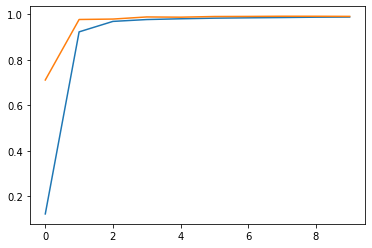

Test loss: 0.022726700987247023
Test accuracy: 0.9917
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.6936 - acc: 0.7624 - val_loss: 0.0888 - val_acc: 0.9711
Epoch 2/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1051 - acc: 0.9691 - val_loss: 0.0362 - val_acc: 0.9882
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0731 - acc: 0.9787 - val_loss: 0.0302 - val_acc: 0.9903
Epoch 4/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0574 - acc: 0.9835 - val_loss: 0.0255 - val_acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0478 - acc: 0.9861 - val_loss: 0.0257 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0422 - acc: 0.9877 - val_loss: 0.0224 - val_acc: 0.9920
Epoch 7/10
60000/60000 [============================

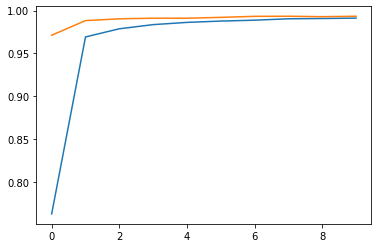

Test loss: 0.021124175457318005
Test accuracy: 0.9933
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/step - loss: 2.0754 - acc: 0.2146 - val_loss: 0.2112 - val_acc: 0.9381
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1949 - acc: 0.9422 - val_loss: 0.0599 - val_acc: 0.9798
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1025 - acc: 0.9697 - val_loss: 0.0404 - val_acc: 0.9855
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0780 - acc: 0.9771 - val_loss: 0.0311 - val_acc: 0.9893
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0648 - acc: 0.9810 - val_loss: 0.0313 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0566 - acc: 0.9830 - val_loss: 0.0291 - val_acc: 0.9913
Epoch 7/10
60000/60000 [==============================

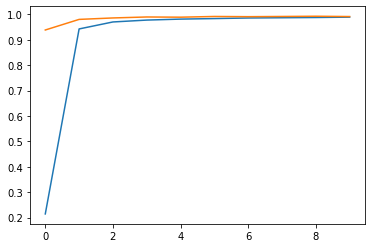

Test loss: 0.03288116068874592
Test accuracy: 0.991
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.8439 - acc: 0.7024 - val_loss: 0.0561 - val_acc: 0.9814
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.1014 - acc: 0.9707 - val_loss: 0.0434 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0732 - acc: 0.9788 - val_loss: 0.0261 - val_acc: 0.9907
Epoch 4/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0571 - acc: 0.9833 - val_loss: 0.0244 - val_acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0484 - acc: 0.9862 - val_loss: 0.0210 - val_acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0408 - acc: 0.9881 - val_loss: 0.0274 - val_acc: 0.9912
Epoch 7/10
60000/60000 [==============================

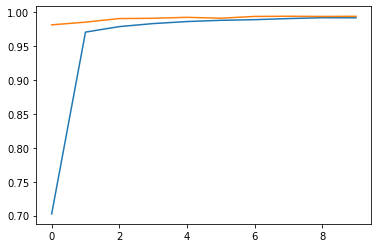

Test loss: 0.02044580983894266
Test accuracy: 0.994
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 1.8690 - acc: 0.2991 - val_loss: 0.1796 - val_acc: 0.9433
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1670 - acc: 0.9510 - val_loss: 0.0495 - val_acc: 0.9824
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0955 - acc: 0.9718 - val_loss: 0.0353 - val_acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0728 - acc: 0.9787 - val_loss: 0.0332 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0629 - acc: 0.9820 - val_loss: 0.0262 - val_acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0537 - acc: 0.9849 - val_loss: 0.0235 - val_acc: 0.9922
Epoch 7/10
60000/60000 [=============================

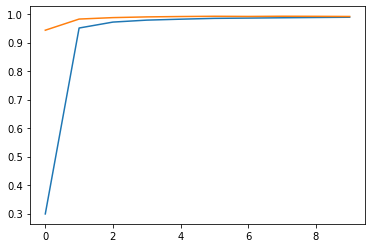

Test loss: 0.023338830458612937
Test accuracy: 0.9915
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.6822 - acc: 0.7648 - val_loss: 0.0777 - val_acc: 0.9770
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1042 - acc: 0.9703 - val_loss: 0.0351 - val_acc: 0.9888
Epoch 3/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0688 - acc: 0.9808 - val_loss: 0.0270 - val_acc: 0.9907
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0568 - acc: 0.9840 - val_loss: 0.0261 - val_acc: 0.9913
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0486 - acc: 0.9855 - val_loss: 0.0258 - val_acc: 0.9918
Epoch 6/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0448 - acc: 0.9869 - val_loss: 0.0255 - val_acc: 0.9924
Epoch 7/10
60000/60000 [============================

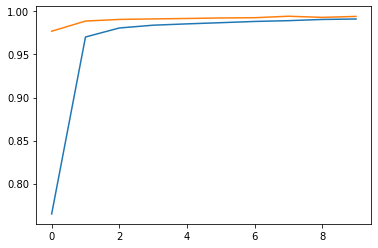

Test loss: 0.018152302790267277
Test accuracy: 0.9942
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 2.3303 - acc: 0.1088 - val_loss: 2.2994 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.6147 - acc: 0.7873 - val_loss: 0.0735 - val_acc: 0.9771
Epoch 3/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1136 - acc: 0.9662 - val_loss: 0.0518 - val_acc: 0.9845
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0825 - acc: 0.9760 - val_loss: 0.0326 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0670 - acc: 0.9803 - val_loss: 0.0311 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0582 - acc: 0.9820 - val_loss: 0.0269 - val_acc: 0.9914
Epoch 7/10
60000/60000 [=============================

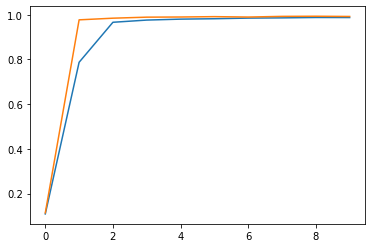

Test loss: 0.021416870124928756
Test accuracy: 0.9922
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.6567 - acc: 0.7776 - val_loss: 0.0717 - val_acc: 0.9760
Epoch 2/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1050 - acc: 0.9687 - val_loss: 0.0395 - val_acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0722 - acc: 0.9791 - val_loss: 0.0302 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0561 - acc: 0.9837 - val_loss: 0.0263 - val_acc: 0.9923
Epoch 5/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0477 - acc: 0.9857 - val_loss: 0.0205 - val_acc: 0.9927
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0422 - acc: 0.9879 - val_loss: 0.0210 - val_acc: 0.9924
Epoch 7/10
60000/60000 [============================

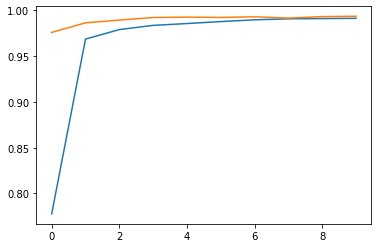

Test loss: 0.017673119320432307
Test accuracy: 0.9937
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/step - loss: 2.3153 - acc: 0.1083 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 2.2912 - acc: 0.1212 - val_loss: 1.4651 - val_acc: 0.5547
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2750 - acc: 0.9154 - val_loss: 0.0586 - val_acc: 0.9793
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1014 - acc: 0.9709 - val_loss: 0.0398 - val_acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0769 - acc: 0.9779 - val_loss: 0.0319 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0646 - acc: 0.9812 - val_loss: 0.0273 - val_acc: 0.9907
Epoch 7/10
60000/60000 [============================

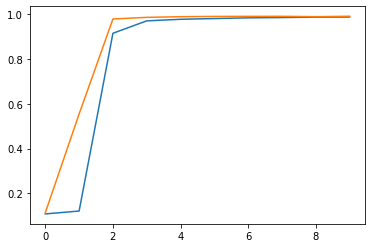

Test loss: 0.026582506231627757
Test accuracy: 0.9915
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.7565 - acc: 0.7363 - val_loss: 0.0643 - val_acc: 0.9807
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1038 - acc: 0.9694 - val_loss: 0.0423 - val_acc: 0.9850
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0722 - acc: 0.9788 - val_loss: 0.0303 - val_acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0562 - acc: 0.9840 - val_loss: 0.0265 - val_acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0485 - acc: 0.9857 - val_loss: 0.0225 - val_acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0411 - acc: 0.9881 - val_loss: 0.0205 - val_acc: 0.9931
Epoch 7/10
60000/60000 [=============================

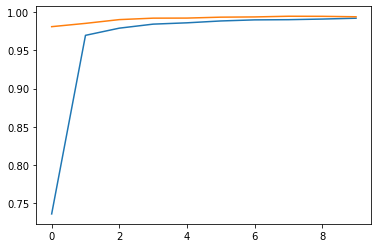

Test loss: 0.01866518780498177
Test accuracy: 0.9936
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 148us/step - loss: 2.2122 - acc: 0.1620 - val_loss: 0.4493 - val_acc: 0.8642
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2186 - acc: 0.9343 - val_loss: 0.0603 - val_acc: 0.9788
Epoch 3/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1019 - acc: 0.9707 - val_loss: 0.0419 - val_acc: 0.9878
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0786 - acc: 0.9774 - val_loss: 0.0365 - val_acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0622 - acc: 0.9817 - val_loss: 0.0276 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0580 - acc: 0.9838 - val_loss: 0.0291 - val_acc: 0.9911
Epoch 7/10
60000/60000 [============================

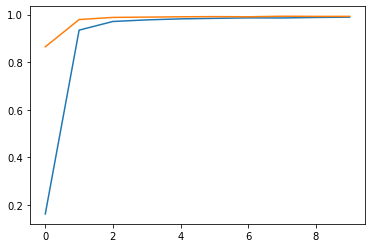

Test loss: 0.024341597971363264
Test accuracy: 0.9922
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.6371 - acc: 0.7860 - val_loss: 0.0694 - val_acc: 0.9789
Epoch 2/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0992 - acc: 0.9701 - val_loss: 0.0405 - val_acc: 0.9871
Epoch 3/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0677 - acc: 0.9802 - val_loss: 0.0287 - val_acc: 0.9903
Epoch 4/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0545 - acc: 0.9843 - val_loss: 0.0260 - val_acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0469 - acc: 0.9868 - val_loss: 0.0178 - val_acc: 0.9944
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0416 - acc: 0.9878 - val_loss: 0.0203 - val_acc: 0.9938
Epoch 7/10
60000/60000 [==========================

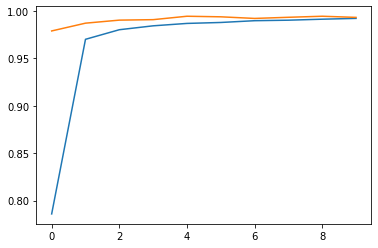

Test loss: 0.019011700634241742
Test accuracy: 0.9932
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/step - loss: 2.2400 - acc: 0.1483 - val_loss: 0.4226 - val_acc: 0.8851
Epoch 2/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2271 - acc: 0.9333 - val_loss: 0.0572 - val_acc: 0.9808
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1007 - acc: 0.9709 - val_loss: 0.0434 - val_acc: 0.9859
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0761 - acc: 0.9780 - val_loss: 0.0364 - val_acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0630 - acc: 0.9821 - val_loss: 0.0292 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0533 - acc: 0.9843 - val_loss: 0.0256 - val_acc: 0.9916
Epoch 7/10
60000/60000 [===========================

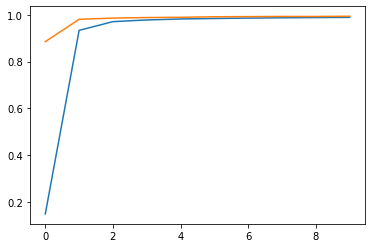

Test loss: 0.019206465881085932
Test accuracy: 0.9939
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.5982 - acc: 0.8011 - val_loss: 0.0647 - val_acc: 0.9778
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1056 - acc: 0.9693 - val_loss: 0.0402 - val_acc: 0.9860
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0734 - acc: 0.9783 - val_loss: 0.0351 - val_acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0577 - acc: 0.9834 - val_loss: 0.0258 - val_acc: 0.9922
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0491 - acc: 0.9862 - val_loss: 0.0242 - val_acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0434 - acc: 0.9877 - val_loss: 0.0180 - val_acc: 0.9947
Epoch 7/10
60000/60000 [==========================

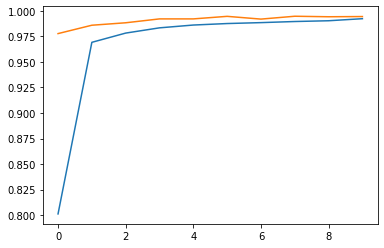

Test loss: 0.021433072173290522
Test accuracy: 0.9945
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 169us/step - loss: 2.3212 - acc: 0.1095 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 6s 102us/step - loss: 2.3015 - acc: 0.1118 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/10
60000/60000 [==============================] - 6s 107us/step - loss: 2.2497 - acc: 0.1387 - val_loss: 0.6804 - val_acc: 0.7643
Epoch 4/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.2393 - acc: 0.9273 - val_loss: 0.0595 - val_acc: 0.9816
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1035 - acc: 0.9697 - val_loss: 0.0393 - val_acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0736 - acc: 0.9780 - val_loss: 0.0320 - val_acc: 0.9913
Epoch 7/10
60000/60000 [==========================

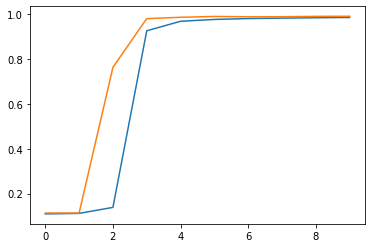

Test loss: 0.023591986717306283
Test accuracy: 0.9922
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.7985 - acc: 0.7199 - val_loss: 0.0899 - val_acc: 0.9713
Epoch 2/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1075 - acc: 0.9687 - val_loss: 0.0385 - val_acc: 0.9869
Epoch 3/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0759 - acc: 0.9779 - val_loss: 0.0308 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0580 - acc: 0.9833 - val_loss: 0.0226 - val_acc: 0.9920
Epoch 5/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0483 - acc: 0.9862 - val_loss: 0.0259 - val_acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0417 - acc: 0.9879 - val_loss: 0.0225 - val_acc: 0.9929
Epoch 7/10
60000/60000 [==========================

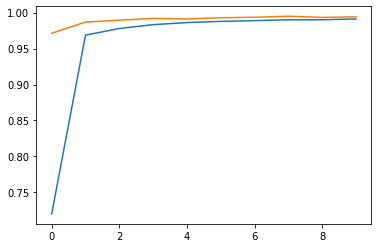

Test loss: 0.021543118916139338
Test accuracy: 0.9942
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 158us/step - loss: 2.3219 - acc: 0.1098 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 2.3017 - acc: 0.1122 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 2.3014 - acc: 0.1122 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 2.3013 - acc: 0.1122 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 1.1450 - acc: 0.5819 - val_loss: 0.1018 - val_acc: 0.9706
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1360 - acc: 0.9609 - val_loss: 0.0478 - val_acc: 0.9853
Epoch 7/10
60000/60000 [============================

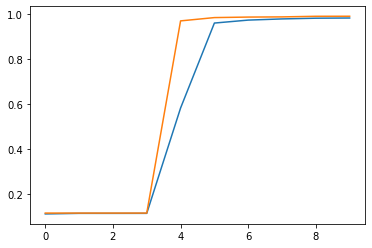

Test loss: 0.02665953222698463
Test accuracy: 0.9913
(60000, 28, 28, 3)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.8294 - acc: 0.7077 - val_loss: 0.0710 - val_acc: 0.9797
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.1061 - acc: 0.9703 - val_loss: 0.0494 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0716 - acc: 0.9792 - val_loss: 0.0272 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0567 - acc: 0.9839 - val_loss: 0.0287 - val_acc: 0.9913
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0484 - acc: 0.9860 - val_loss: 0.0203 - val_acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0410 - acc: 0.9879 - val_loss: 0.0175 - val_acc: 0.9943
Epoch 7/10
60000/60000 [============================

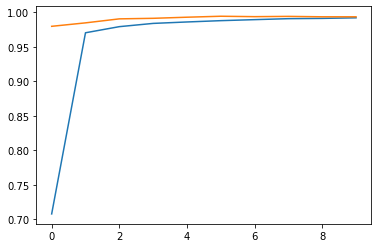

Test loss: 0.0196816578080141
Test accuracy: 0.9935


In [70]:
# computing the results multiple times
for _ in range(networks):
    # training models
    model_nobatch, model_batch = [get_model(use_batch_norm = x) for x in [False, True]]
    
    # obtaining experiment from a model
    err_nobatch, err_batch = [np.linalg.norm(np.mean(
        ModelInputCrashExperiment(model, p = p).compute_error(x, repetitions = repetitions),
        axis = 1))
           for model in [model_nobatch, model_batch]]
    
    # saving results to the array
    [lst.append(item) for lst, item in zip([errors_nobatch, errors_batch], [err_nobatch, err_batch])]

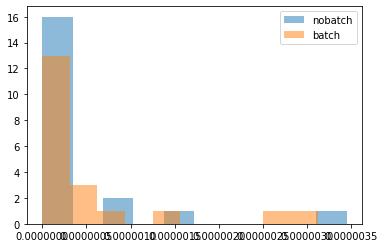

In [75]:
# Distribution of error without and with batch norm
plt.hist(errors_nobatch, alpha = 0.5, label = 'nobatch')
plt.hist(errors_batch, alpha = 0.5, label = 'batch')
plt.legend()
plt.show()

**Distributions look similar, doing a significance test**

In [77]:
# Mean error without batch norm and with batch norm
np.mean(errors_nobatch), np.mean(errors_batch)

(3.4606956e-07, 4.9162384e-07)

In [80]:
scipy.stats.mannwhitneyu(errors_nobatch, errors_batch)

MannwhitneyuResult(statistic=194.0, pvalue=0.44086539586956214)

**Since p-value is high, the null hypothesis that the distributions are the same is not rejected.**